<a href="https://colab.research.google.com/github/109368018yumin/project/blob/main/Remove_RF_LR0223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#########remove outliers###########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive 

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/dissertation/UIC_data/output/
df_all = pd.read_csv("NORMAL_BLOOD_PRESSURE2.csv") 

num_features = ['PTT', 'PPG_DBP_Time_divide_PTT','PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

Mounted at /content/gdrive
/content/gdrive/MyDrive/dissertation/UIC_data/output


,PTT,PPG_DBP_Time_divide_PTT,PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.368,0.120,0.630435,119.57,66.135
2,0.224,0.136,0.480,0.360,0.120,0.622222,118.98,66.184
3,0.216,0.136,0.472,0.352,0.120,0.613636,119.57,66.623
4,0.224,0.136,0.488,0.360,0.128,0.622222,118.59,62.569


In [2]:
df.describe()

,PTT,PPG_DBP_Time_divide_PTT,PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
count,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000
mean,0.257255,0.206001,0.645377,0.463255,0.182121,0.571717,109.412566,65.614721
std,0.046983,0.093998,0.112043,0.090454,0.045698,0.133757,7.701375,5.087494
min,0.008000,0.016000,0.360000,0.200000,0.088000,0.010526,80.104000,60.020000
25%,0.224000,0.136000,0.560000,0.392000,0.152000,0.469697,104.040000,61.739000
50%,0.256000,0.192000,0.608000,0.440000,0.168000,0.580000,111.070000,64.279000
75%,0.288000,0.280000,0.728000,0.536000,0.200000,0.653061,115.780000,67.307000
max,0.664000,0.936000,1.576000,1.144000,1.104000,0.960526,119.980000,79.997000


In [3]:
ft = ['PTT', 'PPG_DBP_Time_divide_PTT','PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
remove = set()

for x in ft:
  q25, q75 = np.percentile(df.loc[:,x], [25, 75])
  n=1.5  #1.5倍四分位距
  #IQR=Q3-Q1
  intra = q75 - q25
  # outlier = Q3 + n*IQR 
  max = q75 + intra *n
  # outlier = Q1 - n*IQR 
  min = q25 - intra *n
  
  transform_data1 = df.loc[df[x] < min, x].index
  transform_data2 = df.loc[df[x] > max, x].index
  remove = remove.union(transform_data1).union(transform_data2)
  
df.drop(remove, inplace=True)
df.to_csv('removed_data.csv')
#########remove outliers###########

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=844ee1a7aedfaaa018d11a84f2b11adf0a1c72908b7d3bdd18846b7e2fad3d76
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_all = pd.read_csv("removed_data.csv") 

num_features = ['PTT', 'PPG_DBP_Time_divide_PTT','PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

,PTT,PPG_DBP_Time_divide_PTT,PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.368,0.120,0.630435,119.57,66.135
2,0.224,0.136,0.480,0.360,0.120,0.622222,118.98,66.184
3,0.216,0.136,0.472,0.352,0.120,0.613636,119.57,66.623
4,0.224,0.136,0.488,0.360,0.128,0.622222,118.59,62.569


In [10]:
df.describe()

,PTT,PPG_DBP_Time_divide_PTT,PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
count,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000
mean,0.256804,0.203255,0.636174,0.460059,0.176116,0.574562,109.211896,65.596323
std,0.042586,0.090543,0.100700,0.085769,0.031690,0.129179,7.678573,5.089873
min,0.136000,0.016000,0.360000,0.200000,0.088000,0.246377,80.446000,60.020000
25%,0.232000,0.136000,0.560000,0.392000,0.152000,0.476923,103.630000,61.739000
50%,0.256000,0.192000,0.600000,0.440000,0.168000,0.582090,110.830000,64.240000
75%,0.280000,0.280000,0.720000,0.528000,0.200000,0.653061,115.470000,67.307000
max,0.376000,0.496000,0.976000,0.752000,0.272000,0.923077,119.980000,79.997000


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


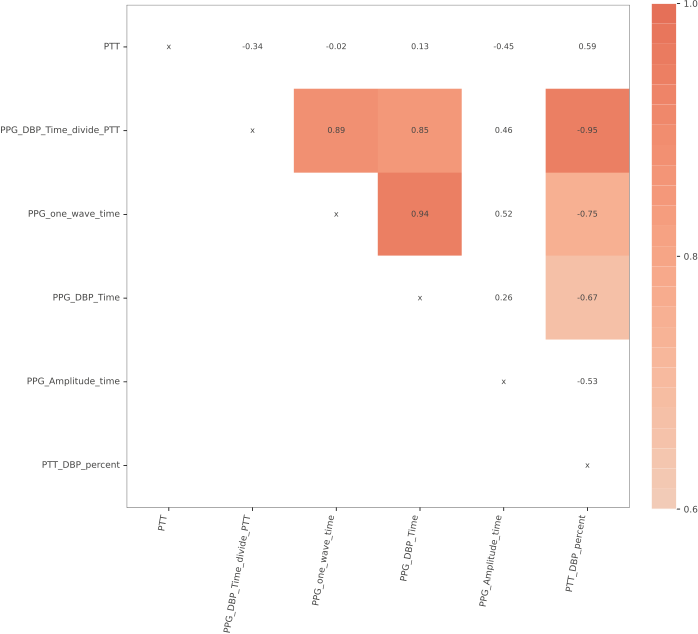

In [11]:
df_target = pd.DataFrame(df, columns=["SBP", "DBP"])
df.drop(["SBP", "DBP"], axis=1, inplace=True)
df_target.head()

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
folds = KFold(n_splits=10, shuffle=True)

# resplit the data after processing
x_train, x_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3)

from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(x_train,figsize=(10,10))
viz


MAE SBP: 4.635374622788852 SD:6.381313893784234 MAE DBP: 2.4651212897098165 SD:9.82318027559185


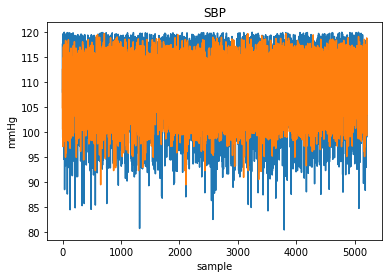

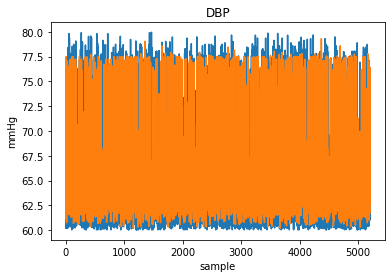

In [12]:
#####RandomForest Regressor#######
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
regressor = RandomForestRegressor(n_estimators = 10) 
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["SBP"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["SBP"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["SBP"])
d = np.vstack(y_test["DBP"])

plt.figure(1)
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

MAE SBP: 5.93628949379022 SD:7.262709815591154 MAE DBP: 3.800917843047814 SD:4.751762665206385


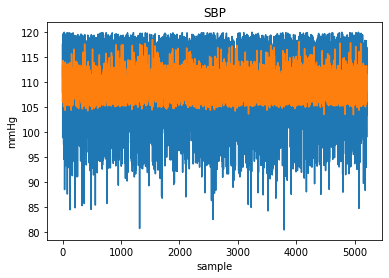

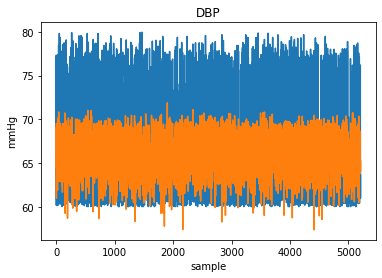

In [13]:
##############Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

linear = LinearRegression()
linear.fit(x_train, y_train)
prediction = linear.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["SBP"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["DBP"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["SBP"])
d = np.vstack(y_test["DBP"])

plt.figure(1)
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
forest = RandomForestRegressor(n_estimators=100)
errors_sbp = []
errors_dbp = []

errors_sbp_std = []
errors_dbp_std = []

for i, (train_idx, val_idx) in enumerate(folds.split(x_train, y_train)):
    train_data, train_target = x_train.iloc[train_idx], y_train.iloc[train_idx]
    val_data, val_target = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    forest.fit(train_data, train_target) 
    predictions = forest.predict(val_data)

    error_sbp = mean_absolute_error(predictions[:,0], val_target["SBP"].values)
    error_dbp = mean_absolute_error(predictions[:,1], val_target["DBP"].values)

    error_sbp_std = np.std(predictions[:,0] - val_target["SBP"].values)
    error_dbp_std = np.std(predictions[:,1] - val_target["DBP"].values)

    print(f"Train fold {i} MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

    errors_sbp.append(error_sbp)
    errors_dbp.append(error_dbp)
    errors_sbp_std.append(error_sbp_std)
    errors_dbp_std.append(error_dbp_std)
    
print(f"Average MAE SBP: {np.mean(errors_sbp)} SD:{np.mean(errors_sbp_std)} MAE DBP: {np.mean(errors_dbp)} SD:{np.mean(errors_dbp_std)}")

Train fold 0 MAE SBP: 4.699811989650538 SD:6.3993246043126915 MAE DBP: 2.4611484315282404 SD:3.634456594753994
Train fold 1 MAE SBP: 4.5169526509532645 SD:6.177998284164971 MAE DBP: 2.2850837360949945 SD:3.3772627985627146
Train fold 2 MAE SBP: 4.750667895335716 SD:6.432988315624234 MAE DBP: 2.3741034093563353 SD:3.5066333180123057
Train fold 3 MAE SBP: 4.452707561057429 SD:6.042554852051271 MAE DBP: 2.3800492742111206 SD:3.516246663917976
Train fold 4 MAE SBP: 4.528298489676441 SD:6.152479530409791 MAE DBP: 2.5238570299269827 SD:3.791422078026835
Train fold 5 MAE SBP: 4.876375064243961 SD:6.613105451178347 MAE DBP: 2.5519538684361396 SD:3.7501620944355487
Train fold 6 MAE SBP: 4.839525541825764 SD:6.727765817075609 MAE DBP: 2.532408593834957 SD:3.7804761507746796
Train fold 7 MAE SBP: 4.771563897691902 SD:6.610246314599456 MAE DBP: 2.4508556076923385 SD:3.635578664556558
Train fold 8 MAE SBP: 4.659867553637258 SD:6.393594435762992 MAE DBP: 2.491886207312861 SD:3.6927968181108475
Train

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error ,r2_score

#print('The mean absolute error is' , mean_absolute_error(predictions,y_test ))
#print('The mean squared error is' , mean_squared_error(predictions,y_test ))
#print('The R squared error is' , r2_score(predictions,y_test))

import pandas as pd
feature_imp = pd.Series(forest.feature_importances_,index=train_data.columns).sort_values(ascending=False)
feature_imp

PPG_DBP_Time               0.325844
PPG_Amplitude_time         0.234329
PTT_DBP_percent            0.153213
PPG_one_wave_time          0.112475
PPG_DBP_Time_divide_PTT    0.095181
PTT                        0.078959
dtype: float64